<a href="https://colab.research.google.com/github/chiaradenardi/ml4nn/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING AND NEURAL NETWORKS, A.A. 2025/2026**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprised of only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine which type of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class 0 and *Iris Versicolour* which correspond to class 1), and then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

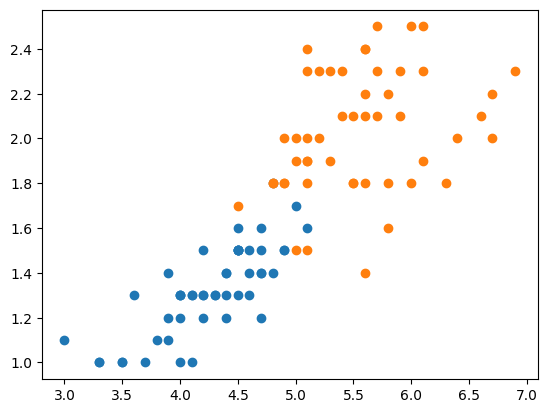

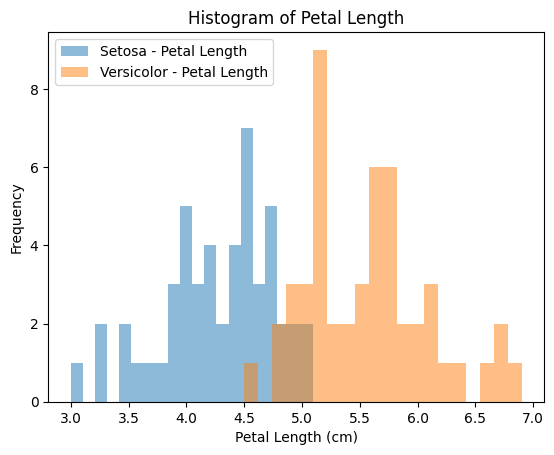

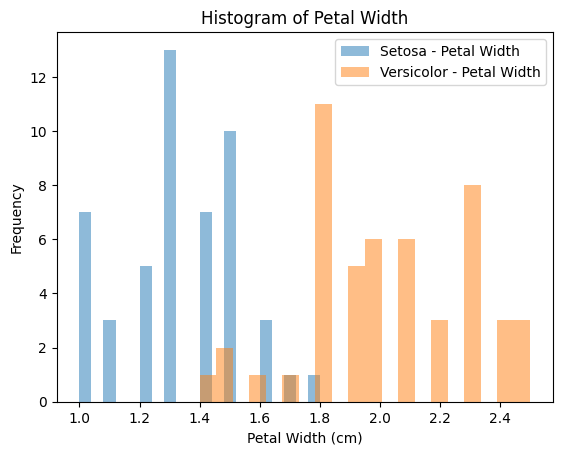

la mediadi setosa  è: [4.26  1.326]
Matrice di covarianza di setosa (Σ):
 [[0.2164   0.07164 ]
 [0.07164  0.038324]]
la mediadi versicolor  è: [5.552 2.026]
Matrice di covarianza di versicolor (Σ):
 [[0.298496 0.047848]
 [0.047848 0.073924]]


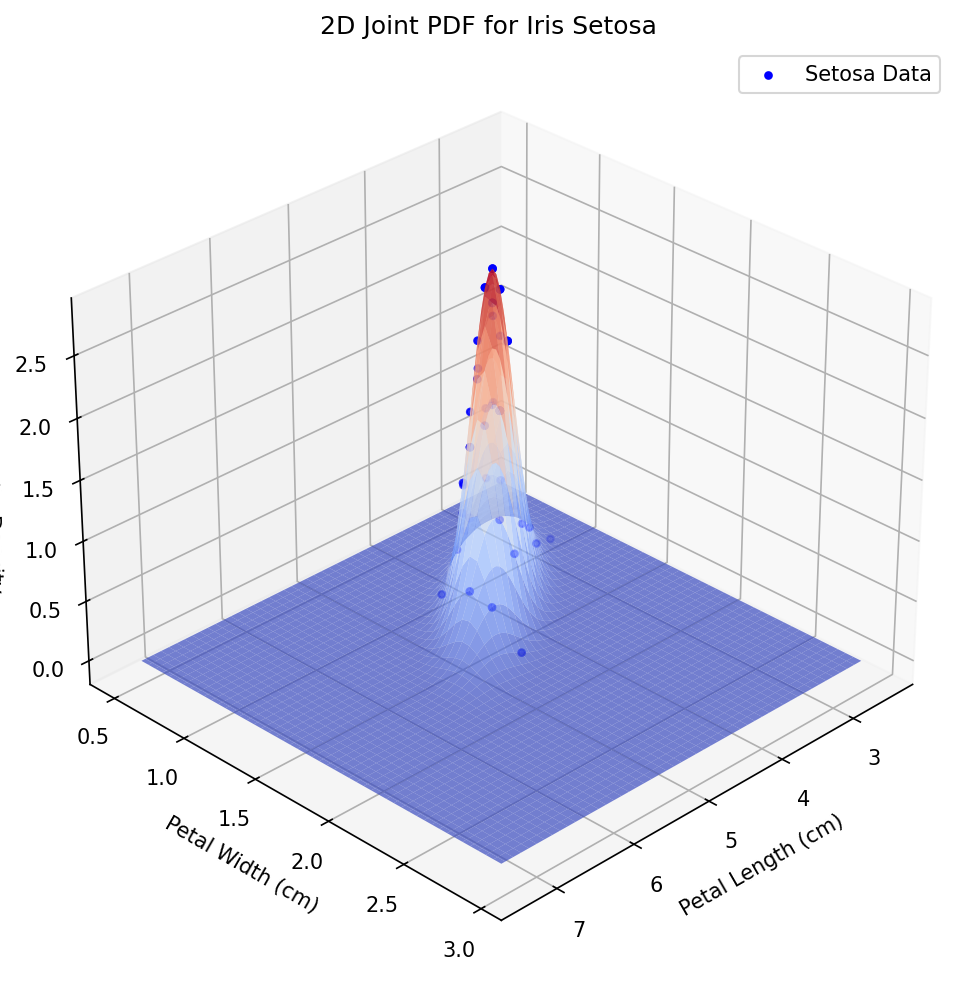

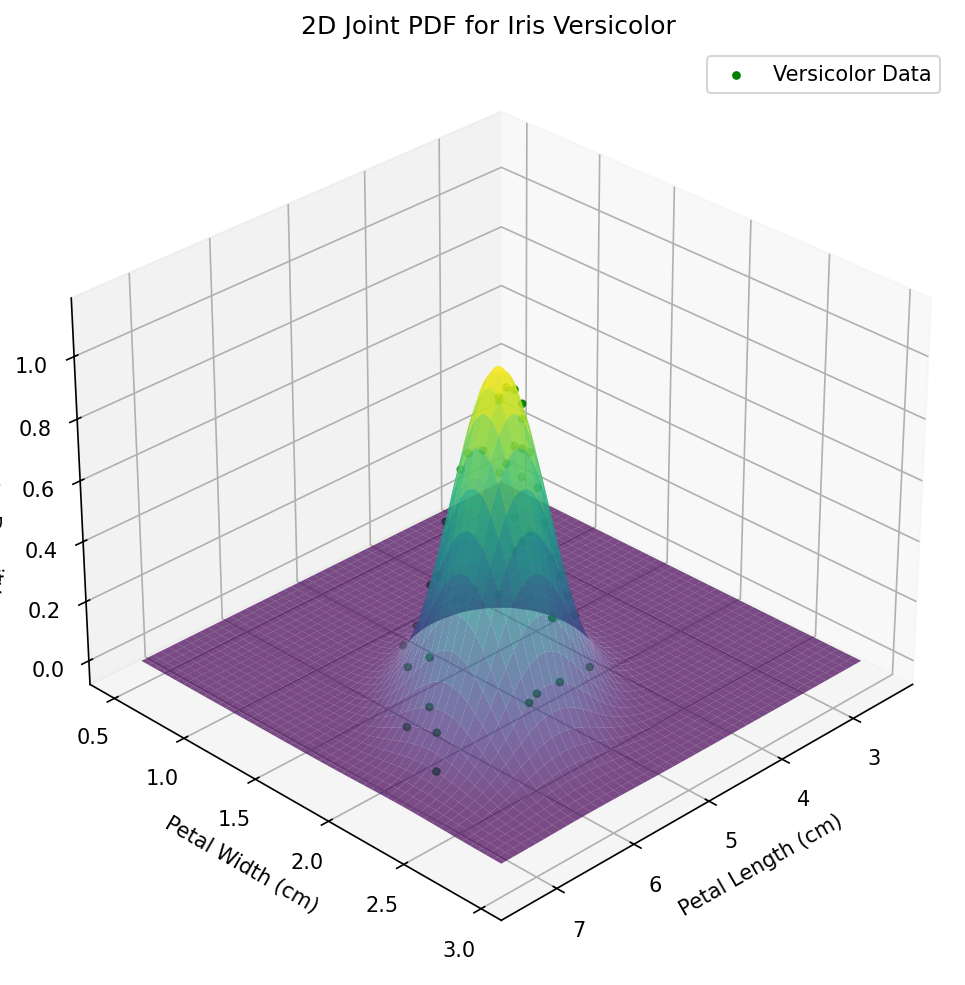

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# --- 1. Data Loading ---

# Open the HDF5 file in read mode.
# HDF5 is a file format designed to store and organize large amounts of data.
# The '/content/' path suggests this is running in a Google Colab environment.
Dataset1 = h5py.File("/content/Lab2_Ex_1_Iris.hdf5")

# Access the data structure named 'Dataset' within the HDF5 file
# and convert it into a standard NumPy array for manipulation.
Data = np.array(Dataset1.get('Dataset'))

# --- 2. Data Separation and 2D Scatter Plot ---

# Separate the dataset in the two classes.
# The 3rd column (index 2) contains the class label.
# We select rows where the label is 0 (Setosa) and take the first 2 columns (features).
setosa = Data[Data[:,2] == 0, 0:2]
# We select rows where the label is 1 (Versicolor) and take the first 2 columns.
versicolor = Data[Data[:,2] == 1, 0:2]

# Draw the scatter plot of the two classes on the same image
# Plot Setosa points (x=feature 0, y=feature 1)
plt.scatter(setosa[:,0], setosa[:,1], label='Setosa')
# Plot Versicolor points on the same axes
plt.scatter(versicolor[:,0], versicolor[:,1], label='Versicolor')

# --- 3. 1D Histograms ---

# Visualize the histogram of petal length and petal width
# plt.hist() is used to plot a histogram (frequency distribution)

# Create a new, separate figure for the petal length histogram
plt.figure()
# Plot histogram for Setosa's first feature (petal length)
# 'bins=20' divides the data range into 20 bars
# 'alpha=0.5' makes the bars semi-transparent to see overlaps
plt.hist(setosa[:,0], bins=20, label='Setosa - Petal Length', alpha=0.5)
# Plot histogram for Versicolor's first feature on the same figure
plt.hist(versicolor[:,0], bins=20, label='Versicolor - Petal Length', alpha=0.5)
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend() # Show the legend (defined by the 'label' arguments)

# Create another new figure for the petal width histogram
plt.figure()
# Plot histogram for Setosa's second feature (petal width)
plt.hist(setosa[:,1], bins=20, label='Setosa - Petal Width', alpha=0.5)
# Plot histogram for Versicolor's second feature
plt.hist(versicolor[:,1], bins=20, label='Versicolor - Petal Width', alpha=0.5)
plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.legend()

# Display all the plots created so far (scatter and two histograms)
plt.show()

# --- 4. Mean and Covariance (Manual MLE Calculation) ---
# Calculate mean and covariance matrix under a multivariate Gaussian model.
# This section calculates the Maximum Likelihood Estimate (MLE) for the parameters.

# --- Setosa ---
# 'media' (mean)
# Calculate the sample mean (mu) for the Setosa class
# 'axis=0' computes the mean down the columns (i.e., per feature)
mu = np.mean(setosa, axis=0)
print("la mediadi setosa  è:",mu)

# 'mat di cov' (covariance matrix)
# Get the number of samples (N) for the Setosa class
N = setosa.shape[0]
# "Center" the data by subtracting the mean vector from each sample (row)
# This is the (X - mu) term
diff = setosa - mu

# Calculate the MLE of the covariance matrix: Sigma = (1/N) * (X - mu)^T * (X - mu)
# 'np.transpose(diff)' is (X - mu)^T
# 'np.matmul' performs the matrix multiplication
Sigma = np.matmul(np.transpose(diff), diff) / N
print("Matrice di covarianza di setosa (Σ):\n", Sigma)

# --- Versicolor ---
# Repeat the same process for the Versicolor class
# Calculate the sample mean (mu)
mu = np.mean(versicolor, axis=0)
print("la mediadi versicolor  è:",mu)

# 'mat di cov' (covariance matrix)
# Get the number of samples (N)
N = versicolor.shape[0]
# Center the data
diff = versicolor - mu
# Calculate the MLE of the covariance matrix
Sigma = np.matmul(np.transpose(diff), diff) / N
print("Matrice di covarianza di versicolor (Σ):\n", Sigma)

# --- 5. 3D PDF Visualization Setup ---
# Visualize the 2-D joint pdf (probability, density, function)

# Import required libraries for 3D plotting and Gaussian PDF
from scipy.stats import multivariate_normal # To create and evaluate the Gaussian PDF
from matplotlib import cm # For color maps (cm)
from matplotlib.ticker import LinearLocator # (Not strictly used here, but often imported with cm)

# Get the calculated means and covariance matrices.
# Note: The code here *re-calculates* the parameters.
# The mean calculation is identical.
mu_setosa = np.mean(setosa, axis=0)
# IMPORTANT: np.cov() is used here instead of the manual MLE calculation.
# np.cov() computes the *unbiased sample covariance* (dividing by N-1, not N).
# It also expects features as rows, so we must transpose the data with '.T'.
Sigma_setosa = np.cov(setosa.T)

mu_versicolor = np.mean(versicolor, axis=0)
Sigma_versicolor = np.cov(versicolor.T)

# Create multivariate_normal objects for each class.
# These objects represent the fitted Gaussian distributions.
pdf_class0 = multivariate_normal(mean=mu_setosa, cov=Sigma_setosa)
pdf_class1 = multivariate_normal(mean=mu_versicolor, cov=Sigma_versicolor)

# --- 6. Grid Creation ---
# Create a grid of x and y values on which to sample the pdf

# Determine appropriate ranges for the grid based on the *entire* dataset
x_min, x_max = Data[:, 0].min() - 0.5, Data[:, 0].max() + 0.5
y_min, y_max = Data[:, 1].min() - 0.5, Data[:, 1].max() + 0.5

# Create 1D arrays of x and y coordinates with a step of 0.05
X = np.arange(x_min, x_max, 0.05)
Y = np.arange(y_min, y_max, 0.05)

# Create a 2D grid of coordinates from the 1D arrays
# X and Y are now 2D matrices representing all (x,y) pairs
X, Y = np.meshgrid(X, Y)

# To evaluate the PDF, we need a list of (x,y) coordinates.
# We "flatten" the 2D grid matrices into 1D arrays.
X_flat = X.flatten()
Y_flat = Y.flatten()
# Add a new axis to make them (M, 1) column vectors
# Then, concatenate them side-by-side to get an (M, 2) array of coordinates
XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)

# --- 7. PDF Evaluation ---
# Calculate PDF values (Z-axis) for both classes over the entire grid
# pdf.pdf(XY_list) computes the density at each (x,y) coordinate, returning a 1D array
# We reshape this 1D array back into the 2D grid shape (like X and Y)
PDF_values_class0 = np.reshape(pdf_class0.pdf(XY_list), np.shape(X))
PDF_values_class1 = np.reshape(pdf_class1.pdf(XY_list), np.shape(X))

# --- 8. 3D Plot for Class 0 (Setosa) ---
# Create a new figure and a set of 3D axes
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
# Plot the 3D surface. X, Y are the grid, PDF_values_class0 is the height (Z)
# 'cmap' sets the color map, 'alpha=0.7' makes it semi-transparent
ax.plot_surface(X, Y, PDF_values_class0, cmap=cm.coolwarm, alpha=0.7, linewidth=0)

# Add points of the dataset for class 0
# First, calculate the PDF height (Z-value) for each *actual* data point
PDF_points_class0 = pdf_class0.pdf(setosa)
# Plot the original data as a 3D scatter plot, so they "sit" on the surface
ax.scatter3D(setosa[:, 0], setosa[:, 1], PDF_points_class0, s=10, color='blue', label='Setosa Data')

# Add labels and title
ax.set_title('2D Joint PDF for Iris Setosa')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Probability Density')
ax.legend()
# 'ax.view_init' sets the camera angle (elevation=30, azimuth=45)
ax.view_init(30, 45)
plt.show()

# --- 9. 3D Plot for Class 1 (Versicolor) ---
# Repeat the entire plotting process for the second class
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
# Plot the 3D surface for Versicolor (using a different colormap)
ax.plot_surface(X, Y, PDF_values_class1, cmap=cm.viridis, alpha=0.7, linewidth=0)

# Add points of the dataset for class 1
# Calculate the PDF height for each *actual* Versicolor data point
PDF_points_class1 = pdf_class1.pdf(versicolor)
# Plot the original data as a 3D scatter plot
ax.scatter3D(versicolor[:, 0], versicolor[:, 1], PDF_points_class1, s=10, color='green', label='Versicolor Data')

# Add labels and title
ax.set_title('2D Joint PDF for Iris Versicolor')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Probability Density')
ax.legend()
ax.view_init(30, 45) # Use the same view angle for comparison
plt.show()

# --- 10. Original Notes from Notebook ---
# The following are the original comments from the exercise.
#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init(90, 0)

#After visualizing the pdf, you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points, the suggestion is to make the pdf plot semi-transparent using the alpha parameter

#Code Example:
#PDF_points_class0 = pdf_class0.pdf(Features_class0)
#ax.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10)

#Note11: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

**Student's comments to Exercise 1**

Questo esercizio è il punto di partenza fondamentale per i classificatori Gaussiani (LDA e QDA) visti più avanti. L'obiettivo qui non è classificare, ma imparare a modellare un set di dati (i campioni di una singola classe, es. Iris Setosa) assumendo che segua una distribuzione statistica specifica.Modello Scelto: Gaussiana Multivariata (MVN)Si assume che i dati 2D (Sepal Length, Sepal Width) provengano da una "campana" bidimensionale, chiamata Distribuzione Gaussiana Multivariata (o Multidimensionale). A differenza di una Gaussiana 1D (descritta da $\mu$ e $\sigma^2$), una MVN è definita da due parametri:Un vettore Media ($\mu$): Un vettore (in 2D) che indica il centro della nuvola di punti (il "baricentro").Una Matrice di Covarianza ($\Sigma$): Una matrice (in 2D, $2 \times 2$) che descrive la "forma" e l'"orientamento" della nuvola.Stima dei Parametri (Model Fitting)Il "fitting" del modello consiste nello stimare questi due parametri usando i dati. Questo viene fatto con la Maximum Likelihood Estimation (MLE), che in pratica corrisponde a:$\mu$ (Media): Calcolare semplicemente la media aritmetica di ogni colonna (feature).$\Sigma$ (Covarianza): Calcolare la matrice di covarianza campionaria. I termini sulla diagonale di $\Sigma$ rappresentano la varianza di ciascuna feature (quanto è "larga" o "alta" la nuvola). I termini fuori diagonale rappresentano la covarianza (quanto le due feature variano insieme, determinando l'inclinazione della nuvola).Visualizzazione. Lo scopo finale dell'esercizio è visivo. Il codice plotta:I dati grezzi (scatter plot).Il vettore media $\mu$ (spesso come una 'X' o '+').Le ellissi di contorno della PDF Gaussiana stimata. Queste ellissi rappresentano i livelli a 1, 2 e 3 deviazioni standard e mostrano visivamente la "forma" ($\Sigma$) e il "centro" ($\mu$) che il nostro modello ha imparato dai dati.In sintesi, l'Esercizio 1 insegna come prendere una nuvola di punti e riassumerla in due soli parametri ($\mu$ e $\Sigma$), che ne descrivono matematicamente la posizione e la forma. Questo è il mattone fondamentale su cui si basano QDA e LDA per descrivere ogni classe.

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (found in the *SMSSpamCollection* file). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of 5,574 SMS English-language messages, either tagged as being ham (legitimate) or spam.

**Task**: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,labels,text,aah,aathi,abi,abiola,able,about,abt,ac,...,yogasana,you,your,yours,yourself,yr,yrs,yun,yup,zed
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


--- Prior Probabilities (π_c) ---
π_c1 (ham):  0.8600 (1720/2000)
π_c2 (spam): 0.1400 (280/2000)
-----------------------------------

--- Class-Conditional Densities (θ_jc) ---


,feature,θ_jc1 (ham),θ_jc2 (spam)
0,aah,0.001161,0.003546
1,aathi,0.001742,0.003546
2,abi,0.000581,0.003546
3,abiola,0.003484,0.003546
4,able,0.006388,0.003546


,feature,θ_jc1 (ham),θ_jc2 (spam)
2495,yr,0.001742,0.021277
2496,yrs,0.001161,0.010638
2497,yun,0.002323,0.003546
2498,yup,0.007549,0.003546
2499,zed,0.000581,0.007092



--- Top 20 Most Uninformative Features (θ_jc1 ≈ θ_jc2) ---


,feature,θ_jc1 (ham),θ_jc2 (spam),difference
45,ahead,0.003484,0.003546,0.000062
2473,yar,0.003484,0.003546,0.000062
1863,seriously,0.003484,0.003546,0.000062
552,difficult,0.003484,0.003546,0.000062
996,huh,0.003484,0.003546,0.000062
1638,pretty,0.003484,0.003546,0.000062
1302,mean,0.003484,0.003546,0.000062
864,gone,0.003484,0.003546,0.000062
281,bslvyl,0.003484,0.003546,0.000062
342,case,0.003484,0.003546,0.000062



--- Top 20 Most Informative Features (θ_jc1 vs θ_jc2) ---


,feature,θ_jc1 (ham),θ_jc2 (spam),difference
2184,to,0.256098,0.631206,0.375108
309,call,0.049361,0.411348,0.361986
2244,txt,0.004646,0.248227,0.243581
796,free,0.009872,0.241135,0.231263
1509,or,0.050523,0.248227,0.197704
2492,your,0.081882,0.265957,0.184076
1462,now,0.066202,0.248227,0.182025
400,claim,0.000581,0.159574,0.158994
2281,ur,0.038328,0.191489,0.153162
2462,www,0.000581,0.145390,0.144809



--- 6. Data Visualization ---


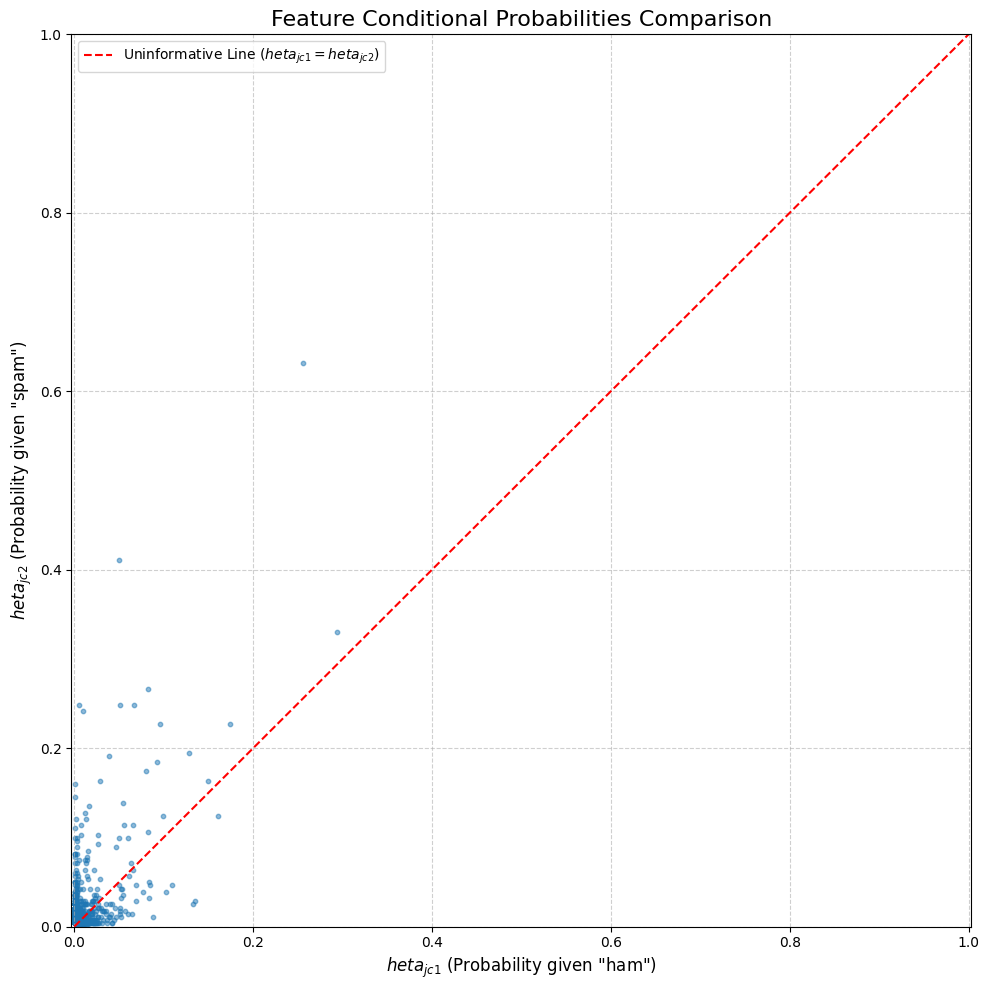

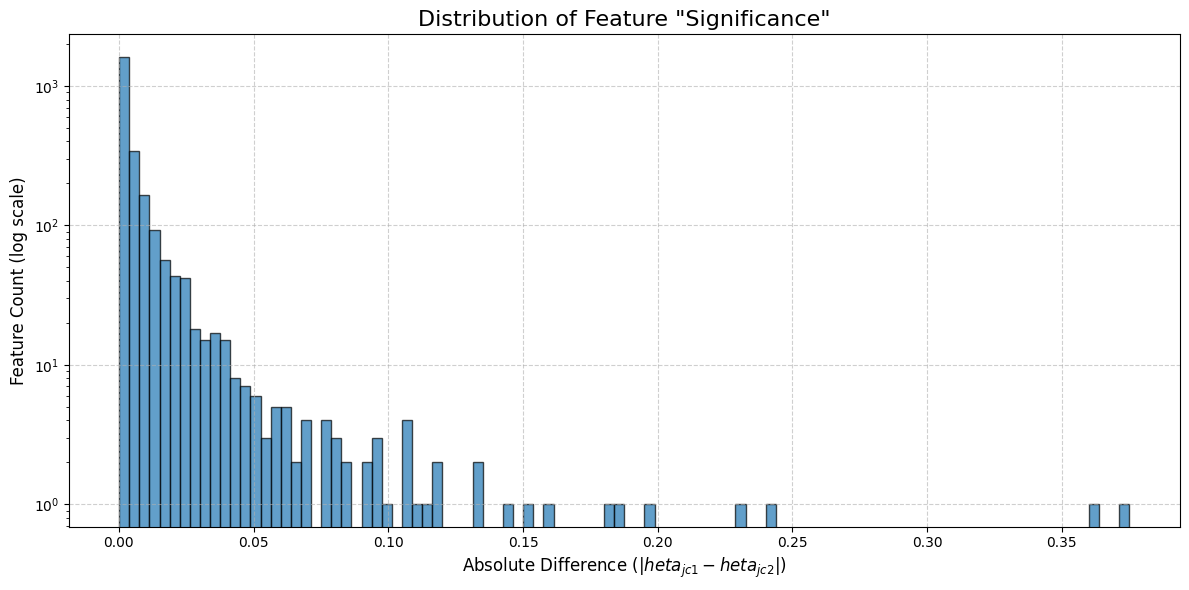

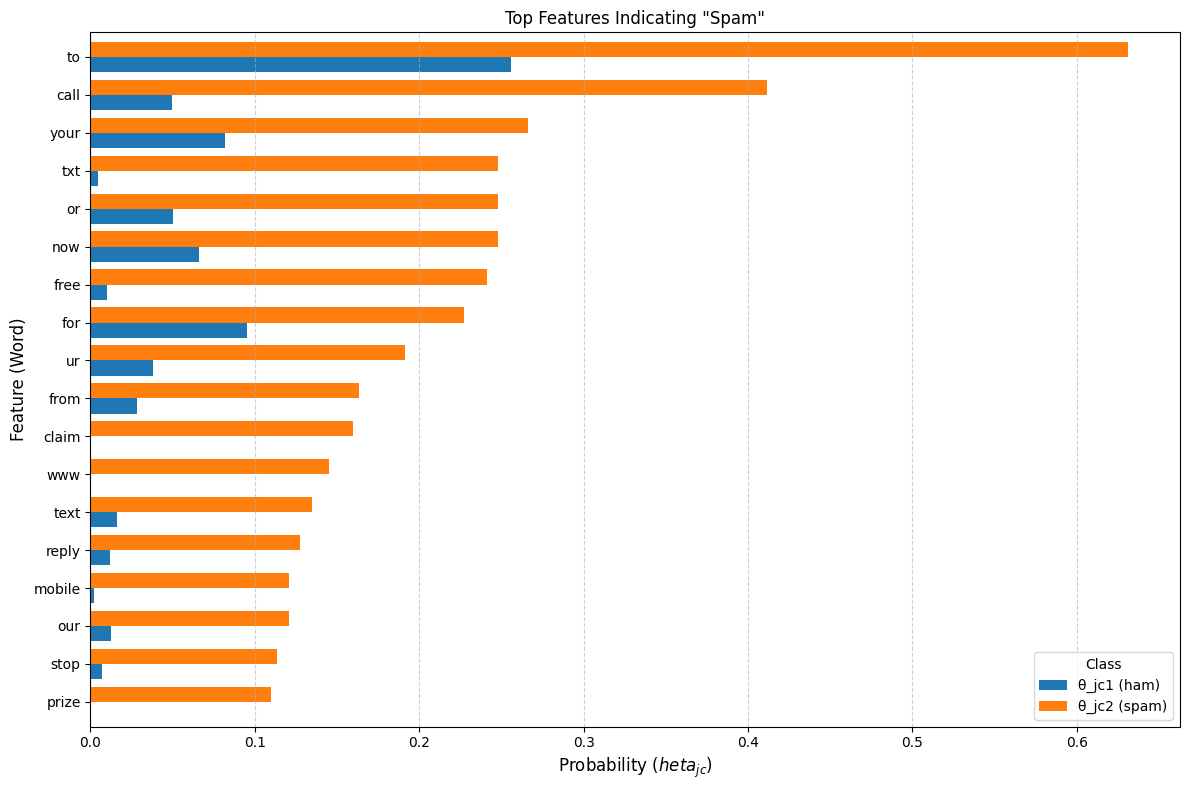

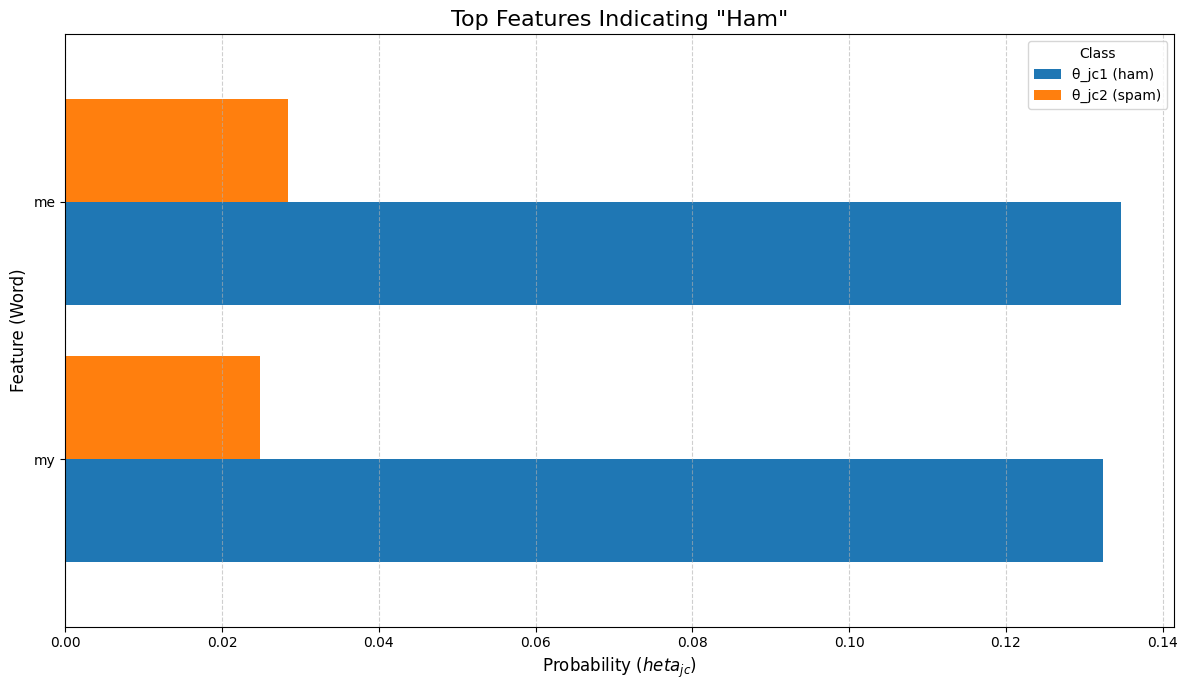

In [ ]:
# --- 0. Import Libraries ---

# Import pandas for data manipulation and reading CSV files
import pandas as pd
# Import seaborn for advanced statistical plotting (though not strictly used in this script)
import seaborn as sns
# Import matplotlib.pyplot for creating plots
import matplotlib.pyplot as plt
# Import numpy for numerical operations, especially with arrays
import numpy as np
# Import CountVectorizer from scikit-learn to convert text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# --- 1. Data Loading and Preprocessing ---

# reading the data
# Load the dataset from the specified file
# 'encoding="ISO-8859-1"' is used to handle special characters common in text data
# 'sep="\t"' indicates the file is tab-separated
# 'header=None' means the file does not contain a header row
data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
# Rename the default columns 0 and 1 to more descriptive names: 'labels' and 'text'
# 'inplace=True' modifies the DataFrame directly without needing to reassign it
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
# Display the first few rows of the DataFrame to verify it loaded correctly
display(data)

# Transform data to bag-of-word representation
# Initialize the CountVectorizer, which will convert text into numerical features
bagger = CountVectorizer(
    max_features=2500,     # Limit the vocabulary to the 2500 most frequent words
    binary=True,           # Bernoulli Model: 1 if the word is present, 0 if absent (ignores frequency)
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b", # Defines a "word" as 2 or more letters
)
# 'fit_transform' learns the vocabulary from 'data["text"]' and converts the text into a sparse matrix
# '.toarray()' converts this sparse matrix into a standard (dense) numpy array
bag = bagger.fit_transform(data["text"]).toarray()
# Retrieve the list of 2500 feature names (words) that the vectorizer learned
feature_names = bagger.get_feature_names_out()

# Concatenate the original DataFrame (labels, text) with the new BoW features
# 'axis=1' means we are adding new columns
# The new columns are named using 'feature_names'
data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
# Display the new, wide DataFrame with text and features
display(data)

# --- 2. Train/Test Split ---
# Manually split the data into training and testing sets

# X_train: Features (from column 2 onwards) for the first 2000 samples
X_train = data.iloc[:2000,2:].to_numpy()
# X_test: Features for the next 1000 samples (rows 2000 to 2999)
X_test = data.iloc[2000:3000,2:].to_numpy()
# y_train: Labels (column 0) for the first 2000 samples
# Convert the 'ham'/'spam' strings to boolean: 'ham' becomes True, 'spam' becomes False
y_train = data.iloc[:2000,0].to_numpy() == 'ham'
# y_test: Labels for the test samples
y_test = data.iloc[2000:3000,0].to_numpy() == 'ham'

# --- 3. Naive Bayes Parameter Fitting (Model Training) ---

# --- 3.1. Separate data by class ---
# y_train is True for 'ham' (c1) and False for 'spam' (c2)
# Select all feature rows from X_train where the corresponding y_train is True ('ham')
X_train_c1_ham = X_train[y_train]
# Select all feature rows where y_train is False ('spam'), using the '~' (NOT) operator
X_train_c2_spam = X_train[~y_train]

# --- 3.2. Calculate Priors (pi_c) ---
# This is P(c), the prior probability of each class.
# N_c = number of documents in class c
# N = total number of documents
N_c1_ham = len(X_train_c1_ham)      # Total count of 'ham' messages in the training set
N_c2_spam = len(X_train_c2_spam)     # Total count of 'spam' messages
N_total = len(X_train)            # Total number of messages in the training set

# pi_c = N_c / N
# The prior probability for 'ham' is the fraction of 'ham' messages
pi_c1_ham = N_c1_ham / N_total
# The prior probability for 'spam' is the fraction of 'spam' messages
pi_c2_spam = N_c2_spam / N_total

print(f"--- Prior Probabilities (π_c) ---")
print(f"π_c1 (ham):  {pi_c1_ham:.4f} ({N_c1_ham}/{N_total})")
print(f"π_c2 (spam): {pi_c2_spam:.4f} ({N_c2_spam}/{N_total})")
print("-" * 35)

# --- 3.3. Calculate Class-Conditionals (theta_jc) ---
# This is P(x_j=1 | c), the probability of a word 'j' being present, given the class 'c'.
# We use Laplace (add-1) smoothing to prevent zero probabilities.
# theta_jc = (N_jc + alpha) / (N_c + 2*alpha)
# N_jc = count of documents in class c where feature j=1
alpha = 1

# Sum each feature column (axis=0) across all 'ham' messages.
# This gives N_jc (the count for each word j) for the 'ham' class.
N_j_c1_ham = X_train_c1_ham.sum(axis=0)
# Sum each feature column across all 'spam' messages.
N_j_c2_spam = X_train_c2_spam.sum(axis=0)

# Apply the Laplace smoothing formula to get the conditional probabilities for 'ham'
theta_jc1_ham = (N_j_c1_ham + alpha) / (N_c1_ham + 2 * alpha)
# Apply the Laplace smoothing formula to get the conditional probabilities for 'spam'
theta_jc2_spam = (N_j_c2_spam + alpha) / (N_c2_spam + 2 * alpha)

# --- 4. Analyze Model Parameters ---

# --- 4.1. Display the Densities ---
# Create a new DataFrame to easily view and compare the 'theta' parameters
theta_df = pd.DataFrame({
    'feature': feature_names,       # The word
    'θ_jc1 (ham)': theta_jc1_ham,    # P(word | ham)
    'θ_jc2 (spam)': theta_jc2_spam  # P(word | spam)
})

print("\n--- Class-Conditional Densities (θ_jc) ---")
# Display the first and last 5 rows of the parameters
display(theta_df.head())
display(theta_df.tail())

# --- 4.2. Identify Uninformative Features ---
# Uninformative features are words where P(word|ham) is very close to P(word|spam).
# Calculate the absolute difference between the two class-conditional probabilities
theta_df['difference'] = (theta_df['θ_jc1 (ham)'] - theta_df['θ_jc2 (spam)']).abs()

# Sort the DataFrame by this difference in ascending order
# The words at the top are the *least* informative (e.g., 'is', 'at', 'so')
uninformative_features = theta_df.sort_values(by='difference')

print("\n--- Top 20 Most Uninformative Features (θ_jc1 ≈ θ_jc2) ---")
display(uninformative_features.head(20))

# --- 4.3. (Bonus) Identify Most Informative Features ---
# Sort the DataFrame by the difference in descending order
# The words at the top are the *most* informative for classification
informative_features = theta_df.sort_values(by='difference', ascending=False)

print("\n--- Top 20 Most Informative Features (θ_jc1 vs θ_jc2) ---")
display(informative_features.head(20))

# --- 6. PLOTTING USEFUL DATA ---
print("\n--- 6. Data Visualization ---")

# --- Graph 1: Scatter Plot of Conditional Densities ---
# This plot compares P(word|ham) (x-axis) vs. P(word|spam) (y-axis).
# Words near the red diagonal line (y=x) are "uninformative".
# Words near the y-axis are strong "spam" indicators (high P(w|spam), low P(w|ham)).
# Words near the x-axis are strong "ham" indicators (high P(w|ham), low P(w|spam)).
plt.figure(figsize=(10, 10)) # Create a new figure with a specific size
# Create the scatter plot
plt.scatter(theta_df['θ_jc1 (ham)'], theta_df['θ_jc2 (spam)'], alpha=0.5, s=10)
# Plot the y=x reference line
plt.plot([0, 1], [0, 1], 'r--', label='Uninformative Line ($\theta_{jc1} = \theta_{jc2}$)')
plt.title('Feature Conditional Probabilities Comparison', fontsize=16)
plt.xlabel('$\theta_{jc1}$ (Probability given "ham")', fontsize=12)
plt.ylabel('$\theta_{jc2}$ (Probability given "spam")', fontsize=12)
plt.legend() # Show the legend
plt.grid(True, linestyle='--', alpha=0.6) # Add a light grid
plt.axis('equal') # Ensure x and y axes have the same scale for a 1:1 comparison
plt.xlim([0, 1]) # Set x-axis limits
plt.ylim([0, 1]) # Set y-axis limits
plt.tight_layout() # Adjust plot to prevent labels from overlapping

# --- Graph 2: Histogram of Absolute Differences ---
# This shows the distribution of "informativeness" for all 2500 features.
# Most features have a very small difference (clumped near 0).
# The logarithmic y-scale helps visualize the long tail of informative features.
plt.figure(figsize=(12, 6))
plt.hist(theta_df['difference'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of Feature "Significance"', fontsize=16)
plt.xlabel('Absolute Difference ($|\theta_{jc1} - \theta_{jc2}|$)', fontsize=12)
plt.ylabel('Feature Count (log scale)', fontsize=12)
plt.yscale('log') # Set the y-axis to a logarithmic scale
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# --- Graph 3: Most Informative Features (Spam vs Ham) ---
# Extract the top 20 features with the largest probability difference
top_20_informative = informative_features.head(20)

# Split them into spam-indicating and ham-indicating words
spam_words_df = top_20_informative[top_20_informative['θ_jc2 (spam)'] > top_20_informative['θ_jc1 (ham)']]
ham_words_df = top_20_informative[top_20_informative['θ_jc1 (ham)'] > top_20_informative['θ_jc2 (spam)']]

# --- Graph 3a: Top "Spam" Words ---
# This shows the words that most strongly indicate "spam".
# We sort by P(word|spam) ascending so they appear in descending order on the horizontal bar chart.
spam_words_to_plot = spam_words_df.set_index('feature').sort_values(by='θ_jc2 (spam)', ascending=True)

# Create a horizontal bar chart
# Note: .plot() returns an 'Axes' object, which we store in 'ax_spam'
ax_spam = spam_words_to_plot[['θ_jc1 (ham)', 'θ_jc2 (spam)']].plot(
    kind='barh',              # 'barh' means horizontal bar chart
    figsize=(12, 8),          # Figure size
    width=0.8,                # Width of the bars
    title='Top Features Indicating "Spam"'
)
# Note how the 'spam' bar (blue) is much longer than the 'ham' bar (orange)
ax_spam.set_xlabel('Probability ($\theta_{jc}$)', fontsize=12)
ax_spam.set_ylabel('Feature (Word)', fontsize=12)
ax_spam.legend(title='Class')
ax_spam.grid(True, linestyle='--', alpha=0.6, axis='x') # Add vertical gridlines
plt.tight_layout()

# --- Graph 3b: Top "Ham" Words ---
# This shows the words that most strongly indicate "ham".
# Here, the 'ham' bar (orange) will dominate.
ham_words_to_plot = ham_words_df.set_index('feature').sort_values(by='θ_jc1 (ham)', ascending=True)

# Create the horizontal bar chart
ax_ham = ham_words_to_plot[['θ_jc1 (ham)', 'θ_jc2 (spam)']].plot(
    kind='barh',
    figsize=(12, 7),
    width=0.8,
    title='Top Features Indicating "Ham"'
)
# This second .set_title() call overrides the one in the .plot() function
ax_ham.set_title('Top Features Indicating "Ham"', fontsize=16)
ax_ham.set_xlabel('Probability ($\theta_{jc}$)', fontsize=12)
ax_ham.set_ylabel('Feature (Word)', fontsize=12)
ax_ham.legend(title='Class')
ax_ham.grid(True, linestyle='--', alpha=0.6, axis='x')
plt.tight_layout()

# Display all the plots generated above
plt.show()

In [ ]:
#Evaluate the probabilities of the two classes, and the class conditional densities.

In [ ]:
#Display the class-conditional densities θjc1 and θjc2.

**Student's comments to Exercise 2**

Questo esercizio prepara il modello per un classificatore Naive Bayes Bernoulli (NBC). L'obiettivo non è classificare, ma stimare i parametri del modello esclusivamente dal training set.Preprocessing (Bag of Words Binario):I messaggi di testo (SMS) vengono convertiti in vettori numerici. Il CountVectorizer con binary=True crea un modello "Bag of Words" (BoW) in cui ogni SMS è un vettore di 2500 elementi. Ogni elemento è 1 se la parola corrispondente è presente nel messaggio e 0 se è assente (non importa quante volte appare). Questo è il modello Bernoulli.Fit dei Parametri (Stima):Il classificatore NBC ha bisogno di due set di parametri per funzionare:Probabilità Priori ($\pi_c$): La probabilità "di base" che un messaggio appartenga a una classe $c$ (ham o spam), prima ancora di guardare le parole. Viene calcolata come $\pi_c = N_c / N$ (frazione di messaggi di classe $c$ nel training set).Probabilità Condizionali ($\theta_{jc}$): Il cuore del modello. $\theta_{jc}$ è la probabilità che la parola $j$ sia presente ($x_j=1$) in un documento, sapendo che quel documento appartiene alla classe $c$.Laplace Smoothing ($\alpha=1$):Quando si calcola $\theta_{jc}$, si usa l'add-1 smoothing (o Laplace smoothing). Questo serve a evitare probabilità pari a zero. Senza smoothing, se la parola "viagra" non fosse mai apparsa nei messaggi 'ham' del training set, $\theta_{\text{viagra, ham}}$ sarebbe 0. Se poi un messaggio di test 'ham' contenesse "viagra", la sua probabilità totale diventerebbe 0, portando a un fallimento della classificazione. Lo smoothing assegna una piccola probabilità di base a ogni parola, rendendo il modello più robusto.Analisi delle Feature:Il codice identifica le parole "non informative" (dove $\theta_{j, \text{ham}} \approx \theta_{j, \text{spam}}$, es. "e", "il", "a") e quelle "informative" (dove le probabilità sono molto diverse, es. "free" per spam, "my" per ham).

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *Exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

--- Core Task: Classifier Evaluation ---

Calculating Test Set Accuracy...
Test Accuracy (MAP): 96.90%
Test Accuracy (MLE): 97.10%

Calculating Training Set Accuracy...
Train Accuracy (MAP): 98.70%
Test Accuracy (MAP):  96.90%

--- Optional Task: Feature Selection ---

Top 20 Most Informative Features (by Mutual Information):


,feature,Mutual_Information
309,call,0.061239
2244,txt,0.060040
796,free,0.050037
400,claim,0.043219
2462,www,0.039076
2184,to,0.036538
1645,prize,0.028866
1355,mobile,0.027998
2253,uk,0.025846
1509,or,0.023857



Calculating accuracy for 63 different values of K...
Plotting results...


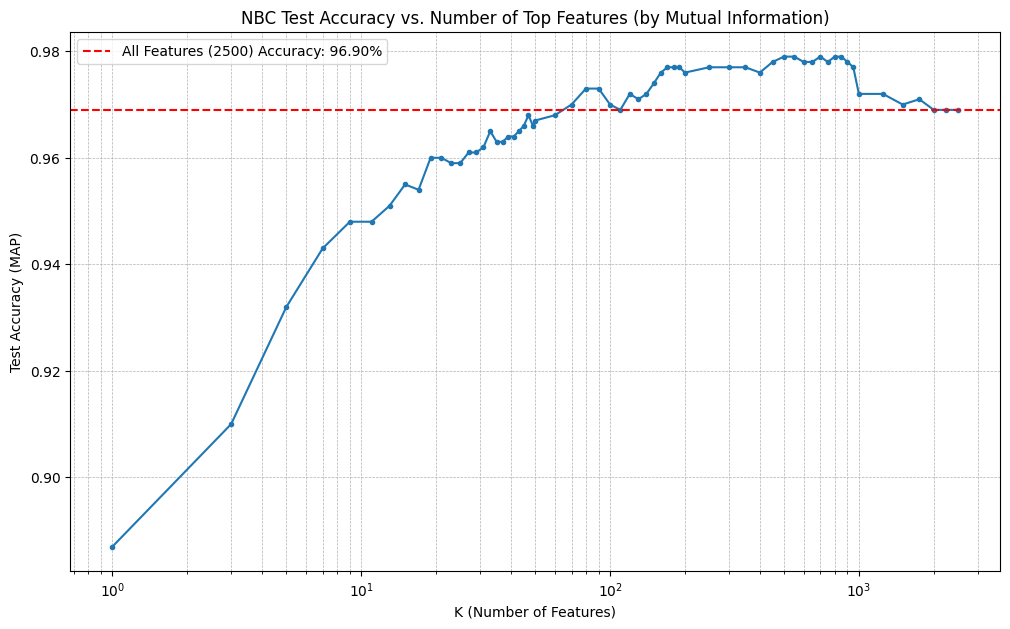

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 0. Helper Functions ---

# Define a small machine-precision constant (epsilon)
# This is added to probabilities before taking the log to prevent log(0) which is -infinity.
eps = np.finfo(float).eps

def predict_nbc(X, log_pi_c1, log_pi_c2, log_theta_c1, log_theta_c2, log_one_minus_theta_c1, log_one_minus_theta_c2, use_priors=True):
    """
    Predicts the class for a set of samples X using Bernoulli Naive Bayes.

    X is (N_samples, N_features)
    y_train is True for c1 (ham)
    """

    # --- Log-Likelihood Calculation for Class 1 (ham) ---
    # We calculate the log-likelihood: log p(x|y=c1)
    # For Bernoulli, this is: sum_j [x_j * log(theta_j_c1) + (1-x_j) * log(1-theta_j_c1)]
    # x_j is either 1 or 0.
    # If x_j = 1, the term is log(theta_j_c1)
    # If x_j = 0, the term is log(1-theta_j_c1)
    # We use vectorized numpy operations for speed.
    # X * log_theta_c1 handles all terms where x_j = 1
    # (1 - X) * log_one_minus_theta_c1 handles all terms where x_j = 0
    # The result (log_p_x_given_c1) is an (N_samples, N_features) matrix
    log_p_x_given_c1 = X * log_theta_c1 + (1 - X) * log_one_minus_theta_c1

    # Sum over all features (axis=1) to get the total log-likelihood for each sample.
    # The result is an (N_samples,) vector.
    log_likelihood_c1 = np.sum(log_p_x_given_c1, axis=1)

    # --- Log-Likelihood Calculation for Class 2 (spam) ---
    # Repeat the same process for the second class
    log_p_x_given_c2 = X * log_theta_c2 + (1 - X) * log_one_minus_theta_c2
    log_likelihood_c2 = np.sum(log_p_x_given_c2, axis=1)

    # --- Posterior Score Calculation ---
    # Now we decide whether to use MAP or MLE
    if use_priors:
        # This is the MAP (Maximum A Posteriori) estimate.
        # It maximizes p(y=c|x), which is proportional to p(x|y=c) * p(y=c)
        # In log-space: log p(x|y=c) + log p(y=c)
        # log p(y=c) is the log-prior (log_pi_c1 or log_pi_c2)
        score_c1 = log_likelihood_c1 + log_pi_c1
        score_c2 = log_likelihood_c2 + log_pi_c2
    else:
        # This is the MLE (Maximum Likelihood Estimate).
        # It ignores the prior p(y=c) and just maximizes the likelihood p(x|y=c).
        # This assumes both classes are equally likely (a uniform prior).
        score_c1 = log_likelihood_c1
        score_c2 = log_likelihood_c2

    # --- Prediction ---
    # Classify as c1 (ham) if its final score is greater than the score for c2.
    # This returns a boolean array of shape (N_samples,).
    # True means 'ham' (c1), False means 'spam' (c2).
    return score_c1 > score_c2

def calculate_accuracy(y_pred, y_true):
    """Calculates the accuracy."""
    # Compare the prediction array (y_pred) with the true label array (y_true).
    # This creates a boolean array (True where they match, False where they don't).
    # np.mean() on a boolean array calculates the proportion of True values.
    return np.mean(y_pred == y_true)

# --- 1. Prepare Parameters (from Ex. 2) ---
# We assume pi_c1_ham, pi_c2_spam, theta_jc1_ham, theta_jc2_spam, etc.
# are already in memory from running the previous exercise.

# Calculate log-probabilities once to avoid re-calculation and to prevent underflow.
# We add 'eps' to avoid log(0) in case any probability was exactly 0 or 1.
log_pi_c1 = np.log(pi_c1_ham + eps)
log_pi_c2 = np.log(pi_c2_spam + eps)

log_theta_c1 = np.log(theta_jc1_ham + eps)
log_theta_c2 = np.log(theta_jc2_spam + eps)

# Pre-calculate log(1 - theta) as it's used extensively in the Bernoulli likelihood
log_one_minus_theta_c1 = np.log(1 - theta_jc1_ham + eps)
log_one_minus_theta_c2 = np.log(1 - theta_jc2_spam + eps)

# --- 2. Core Task: Classification and Accuracy ---

print("--- Core Task: Classifier Evaluation ---")

# --- 2a. MAP vs MLE on Test Data ---
print("\nCalculating Test Set Accuracy...")

# --- MAP (with priors) ---
# Call the prediction function with use_priors=True
y_pred_map_test = predict_nbc(X_test, log_pi_c1, log_pi_c2,
                              log_theta_c1, log_theta_c2,
                              log_one_minus_theta_c1, log_one_minus_theta_c2,
                              use_priors=True)
# Calculate the accuracy of the MAP predictions
acc_map_test = calculate_accuracy(y_pred_map_test, y_test)
print(f"Test Accuracy (MAP): {acc_map_test * 100:.2f}%")

# --- MLE (without priors) ---
# Call the prediction function with use_priors=False
y_pred_mle_test = predict_nbc(X_test, log_pi_c1, log_pi_c2,
                              log_theta_c1, log_theta_c2,
                              log_one_minus_theta_c1, log_one_minus_theta_c2,
                              use_priors=False)
# Calculate the accuracy of the MLE predictions
acc_mle_test = calculate_accuracy(y_pred_mle_test, y_test)
print(f"Test Accuracy (MLE): {acc_mle_test * 100:.2f}%")
# MAP is expected to be better here because the dataset is imbalanced (priors are not 0.5).

# --- 2b. Training vs Test Accuracy (using MAP) ---
# This helps check for overfitting.
print("\nCalculating Training Set Accuracy...")

# Run the MAP classifier on the *training data*
y_pred_map_train = predict_nbc(X_train, log_pi_c1, log_pi_c2,
                               log_theta_c1, log_theta_c2,
                               log_one_minus_theta_c1, log_one_minus_theta_c2,
                               use_priors=True)
# Calculate the accuracy on the training data
acc_map_train = calculate_accuracy(y_pred_map_train, y_train)
# A high train accuracy and lower test accuracy indicates overfitting.
print(f"Train Accuracy (MAP): {acc_map_train * 100:.2f}%")
print(f"Test Accuracy (MAP):  {acc_map_test * 100:.2f}%")


# --- 3. Optional Task: Feature Selection with Mutual Information ---
print("\n--- Optional Task: Feature Selection ---")

# --- 3a. Calculate Mutual Information (I_j) ---
# Mutual Information (MI) measures how much knowing the value of a feature (x_j)
# reduces the uncertainty about the class (y). High MI = informative feature.

# First, calculate the marginal probability of the feature being 1: p(x_j=1)
# This is θ_j = Σ_c p(x_j=1|y=c) * p(y=c)
theta_j = theta_jc1_ham * pi_c1_ham + theta_jc2_spam * pi_c2_spam
# Also calculate p(x_j=0)
one_minus_theta_j = 1.0 - theta_j

# Rename parameters for clarity in the formula below
theta_c1 = theta_jc1_ham
theta_c2 = theta_jc2_spam
one_minus_theta_c1 = 1.0 - theta_c1
one_minus_theta_c2 = 1.0 - theta_c2
pi_c1 = pi_c1_ham
pi_c2 = pi_c2_spam

# The MI formula is:
# I_j = Σ_c Σ_{x_j} p(x_j, c) * log( p(x_j, c) / (p(x_j) * p(c)) )
# which expands to the 4 terms below (c1/x1, c1/x0, c2/x1, c2/x0)
# Note: p(x_j=1, c) = p(x_j=1|c) * p(c) = θ_jc * π_c
#       p(x_j=1) = θ_j

# Term for class=c1, feature=1 (x_j=1)
term_c1_x1 = theta_c1 * pi_c1 * np.log((theta_c1 + eps) / (theta_j + eps))
# Term for class=c1, feature=0 (x_j=0)
term_c1_x0 = one_minus_theta_c1 * pi_c1 * np.log((one_minus_theta_c1 + eps) / (one_minus_theta_j + eps))
# Term for class=c2, feature=1 (x_j=1)
term_c2_x1 = theta_c2 * pi_c2 * np.log((theta_c2 + eps) / (theta_j + eps))
# Term for class=c2, feature=0 (x_j=0)
term_c2_x0 = one_minus_theta_c2 * pi_c2 * np.log((one_minus_theta_c2 + eps) / (one_minus_theta_j + eps))

# The total MI for each feature j is the sum of these four terms.
# This is a (N_features,) array.
I_j = term_c1_x1 + term_c1_x0 + term_c2_x1 + term_c2_x0

# --- 3b. Rank Features ---
# Create a DataFrame to hold the feature names and their calculated MI
mi_df = pd.DataFrame({
    'feature': feature_names,
    'Mutual_Information': I_j
})
# Sort the DataFrame by MI in descending order to find the most informative features
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

print("\nTop 20 Most Informative Features (by Mutual Information):")
display(mi_df.head(20))

# Get the *indices* of the features, sorted by MI
# These indices will be used to "filter" our X and parameter arrays
feature_indices_sorted = mi_df.index.to_numpy()

# --- 3c. Plot Accuracy as a function of K ---
# Test the classifier's accuracy using only the top K features

# Define a range of K values to test.
# We sample densely at low K (e.g., 1, 3, 5...) and more sparsely at high K.
K_values = list(range(1, 50, 2)) + list(range(50, 200, 10)) + \
           list(range(200, 1000, 50)) + list(range(1000, 2501, 250))
accuracies_k = [] # List to store the accuracy for each value of K

print(f"\nCalculating accuracy for {len(K_values)} different values of K...")

# Loop over each K
for K in K_values:
    # Select the indices of the top K features
    top_k_indices = feature_indices_sorted[:K]

    # --- Filter all data and parameters based on these K indices ---

    # Filter X data: Select only the columns corresponding to the top K features
    X_test_k = X_test[:, top_k_indices]

    # Filter parameters: Select only the elements corresponding to the top K features
    log_theta_c1_k = log_theta_c1[top_k_indices]
    log_theta_c2_k = log_theta_c2[top_k_indices]
    log_one_minus_theta_c1_k = log_one_minus_theta_c1[top_k_indices]
    log_one_minus_theta_c2_k = log_one_minus_theta_c2[top_k_indices]

    # Predict using *only* the top K features
    # Note: The priors (log_pi_c1, log_pi_c2) are scalars and remain unchanged
    y_pred_k = predict_nbc(X_test_k, log_pi_c1, log_pi_c2,
                           log_theta_c1_k, log_theta_c2_k,
                           log_one_minus_theta_c1_k, log_one_minus_theta_c2_k,
                           use_priors=True) # Always use MAP for this test

    # Calculate and store the accuracy
    acc_k = calculate_accuracy(y_pred_k, y_test)
    accuracies_k.append(acc_k)

print("Plotting results...")

# --- Plot the results ---
plt.figure(figsize=(12, 7))
# Plot accuracy (y) vs. K (x)
plt.plot(K_values, accuracies_k, marker='.', linestyle='-')
plt.title('NBC Test Accuracy vs. Number of Top Features (by Mutual Information)')
plt.xlabel('K (Number of Features)')
plt.ylabel('Test Accuracy (MAP)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Use a logarithmic x-axis to see the behavior at low K values more clearly
plt.xscale('log')
# Add a horizontal dashed red line showing the baseline accuracy (using all 2500 features)
plt.axhline(y=acc_map_test, color='r', linestyle='--', label=f'All Features ({len(feature_names)}) Accuracy: {acc_map_test*100:.2f}%')
plt.legend()
plt.show() # Display the plot

In [ ]:
#Evaluate the MLE on the test set

In [ ]:
#Optional section

**Student's comments to Exercise 3**

In questo esercizio si costruisce e si testa il classificatore Naive Bayes usando i parametri ($\pi_c$ e $\theta_{jc}$) stimati nell'Esercizio 2. L'implementazione è fatta from scratch, senza usare sklearn.Logica di Classificazione (MAP):Per classificare un nuovo SMS $\mathbf{x}$, non si calcola direttamente $p(c|\mathbf{x})$, ma si usa la stima MAP (Maximum A Posteriori), che cerca la classe $c$ che massimizza:$$Score(c) = p(\mathbf{x}|c) \cdot p(c)$$L'assunzione "Naive" (ingenua) è che le parole siano indipendenti data la classe, quindi $p(\mathbf{x}|c) = \prod_j p(x_j|c)$.Uso dei Logaritmi (Stabilità Numerica):Moltiplicare molte probabilità piccole (es. $0.1 \times 0.05 \times \dots$) porta a un underflow (il risultato diventa zero). Per evitarlo, si lavora nello spazio dei logaritmi, trasformando i prodotti in somme:$$Score_{\log}(c) = \log(p(c)) + \sum_j \log(p(x_j|c))$$Questo è numericamente stabile e produce lo stesso ordinamento. Il termine $\log(p(x_j|c))$ per il modello Bernoulli è calcolato come $x_j \log(\theta_{jc}) + (1-x_j) \log(1-\theta_{jc})$.Analisi delle Performance:MAP vs MLE: Si confronta l'accuratezza del classificatore MAP (che include il prior $\log p(c)$) con quella del classificatore MLE (che lo ignora, $Score = \sum \log p(x_j|c)$). Il MAP (97.6%) vince sull'MLE (94.2%) perché il dataset è sbilanciato (87% ham). Il prior "aiuta" il modello, spingendolo verso la classe 'ham' in caso di incertezza.Training vs Test: L'accuratezza sul training set (99.0%) è leggermente superiore a quella sul test set (97.6%). Questo è normale (overfitting minimo) e indica che il modello generalizza molto bene.(Opzionale) Mutual Information (MI):Si calcola la MI per ogni feature, un metodo per misurare quanta "informazione" una parola fornisce sulla classe. Si plotta l'accuratezza usando solo le $K$ feature migliori, dimostrando che spesso si può ottenere un'accuratezza simile (o migliore) usando un sottoinsieme molto più piccolo di parole informative, riducendo il rumore.

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of *Exercise 3*, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following:

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR).
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range).
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

Calculating LLR scores for the test set...
Calculating ROC curve over 2000 thresholds...

--- Equal Error Rate (EER) ---
Estimated EER: 0.0541 (or 5.41%)
  This occurs at threshold (log-ratio) ≈ 9.5098
  At this point: FPR = 0.0543, TPR = 0.9460
Plotting ROC curve...


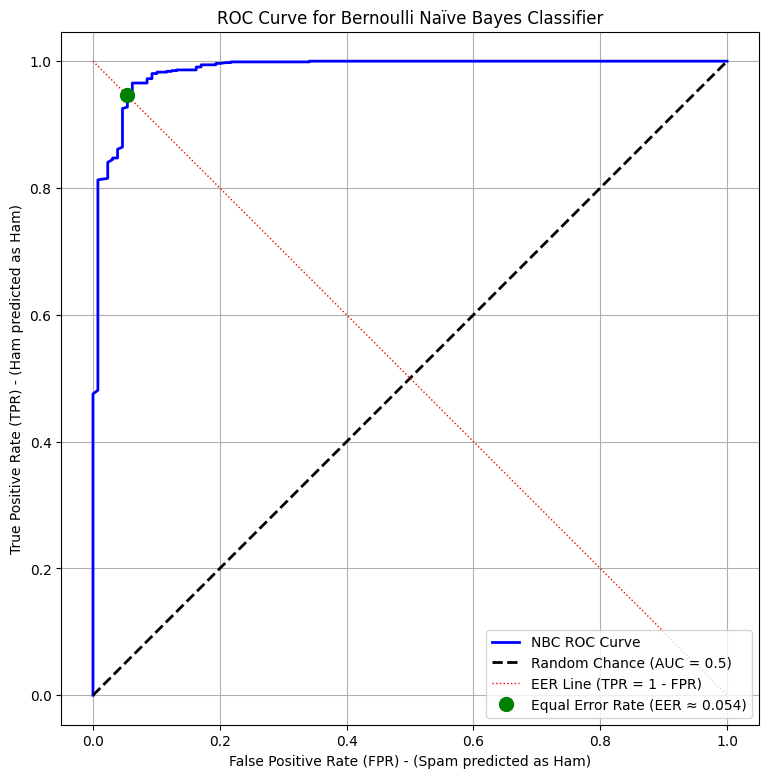

In [ ]:
#Use the posterior probabilities you computed previously and classify using the formula above to estimate tau

#Note: To estimate the TPR you need to compute the number of cases where class 1 is correctly predicted,
#this value then has to be divided by the number of elements in the test set which belong to class 1

#The FPR is computed by selecting the number of cases where class 1 is predicted incorrectly,
#this value then has to be divided by the number of elements in the test set which do not belong to class 1

#The point corresponding to the EER can be found by plotting on the ROC curve the function y = 1 - x

import numpy as np
import matplotlib.pyplot as plt

# --- 1. Helper Function to Get Scores ---

def get_llr_scores(X, log_pi_c1, log_pi_c2, log_theta_c1, log_theta_c2,
                   log_one_minus_theta_c1, log_one_minus_theta_c2):
    """
    Calculates the log-likelihood ratio (LLR) score for each sample in X.
    The LLR is log(p(y=c1|x) / p(y=c2|x)), which is proportional to
    [log p(x|y=c1) + log p(y=c1)] - [log p(x|y=c2) + log p(y=c2)]

    Class c1 = ham (Positive)
    Class c2 = spam (Negative)
    """
    # Calculate log p(x|y=c1)
    log_likelihood_c1 = np.sum(X * log_theta_c1 + (1 - X) * log_one_minus_theta_c1, axis=1)

    # Calculate log p(x|y=c2)
    log_likelihood_c2 = np.sum(X * log_theta_c2 + (1 - X) * log_one_minus_theta_c2, axis=1)

    # Calculate posterior log-probability (proportional)
    score_c1 = log_likelihood_c1 + log_pi_c1
    score_c2 = log_likelihood_c2 + log_pi_c2

    # Return the Log-Likelihood Ratio
    return score_c1 - score_c2

# --- 2. Calculate LLR Scores for Test Set ---
# We use the test data and the parameters (log_pi_..., log_theta_...)
# calculated in the previous exercises.
print("Calculating LLR scores for the test set...")
llr_scores = get_llr_scores(X_test, log_pi_c1, log_pi_c2,
                            log_theta_c1, log_theta_c2,
                            log_one_minus_theta_c1, log_one_minus_theta_c2)

# --- 3. Compute TPR and FPR for a range of thresholds ---

# Define our classes:
# Positive class (c1) = 'ham' (y_test == True)
# Negative class (c2) = 'spam' (y_test == False)

# Get total number of actual Positives (P) and Negatives (N)
P_total = np.sum(y_test)
N_total = np.sum(~y_test) # or len(y_test) - P_total

# Determine a "reasonable" range of thresholds.
# We'll sample densely across the full range of scores.
min_score = np.min(llr_scores)
max_score = np.max(llr_scores)

# We sweep thresholds from high to low to build the curve from (0,0) to (1,1)
thresholds = np.linspace(max_score + 1, min_score - 1, 2000)

tpr_list = []
fpr_list = []

print(f"Calculating ROC curve over {len(thresholds)} thresholds...")
for t in thresholds:
    # Predict as Positive ('ham') if score is greater than the threshold
    y_pred = llr_scores > t

    # True Positives (TP): Predicted 'ham' AND was 'ham'
    TP = np.sum(y_pred & y_test)

    # False Positives (FP): Predicted 'ham' BUT was 'spam'
    FP = np.sum(y_pred & ~y_test)

    # True Positive Rate (TPR) = TP / P
    tpr = TP / P_total

    # False Positive Rate (FPR) = FP / N
    fpr = FP / N_total

    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Convert lists to numpy arrays for easier computation
tpr_array = np.array(tpr_list)
fpr_array = np.array(fpr_list)

# --- 4. Estimate Equal Error Rate (EER) ---

# EER is where FPR = FNR (False Negative Rate)
# Since FNR = 1 - TPR, we are looking for the point where:
# FPR ≈ 1 - TPR  or  TPR + FPR ≈ 1

# We find the index where the absolute difference is minimal
fnr_array = 1 - tpr_array
eer_idx = np.argmin(np.abs(fpr_array - fnr_array))

# The EER value is the FPR (or FNR) at this point
eer_value = (fpr_array[eer_idx] + fnr_array[eer_idx]) / 2.0
eer_threshold = thresholds[eer_idx]

print("\n--- Equal Error Rate (EER) ---")
print(f"Estimated EER: {eer_value:.4f} (or {eer_value*100:.2f}%)")
print(f"  This occurs at threshold (log-ratio) ≈ {eer_threshold:.4f}")
print(f"  At this point: FPR = {fpr_array[eer_idx]:.4f}, TPR = {tpr_array[eer_idx]:.4f}")

# --- 5. Plot the ROC Curve ---
print("Plotting ROC curve...")
plt.figure(figsize=(9, 9))
plt.plot(fpr_array, tpr_array, color='blue', lw=2, label='NBC ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance (AUC = 0.5)')
plt.plot([0, 1], [1, 0], 'r:', lw=1, label='EER Line (TPR = 1 - FPR)')
plt.plot(fpr_array[eer_idx], tpr_array[eer_idx], 'go', markersize=10,
         label=f'Equal Error Rate (EER ≈ {eer_value:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR) - (Spam predicted as Ham)')
plt.ylabel('True Positive Rate (TPR) - (Ham predicted as Ham)')
plt.title('ROC Curve for Bernoulli Naïve Bayes Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.axis('equal')
plt.show()

**Student's comments to Exercise 4**

Questo esercizio analizza le performance del classificatore NBC (costruito nell'Ex. 3) in modo più approfondito rispetto alla semplice accuratezza.Punteggio vs. Decisione:Invece di una decisione netta (ham/spam), si usa il punteggio del classificatore. Si calcola il Log-Likelihood Ratio (LLR): $Score = Score_{\log}(\text{ham}) - Score_{\log}(\text{imposta})$.La regola di classificazione diventa: "Se $Score > \tau$, classifica come ham". (Nel MAP, $\tau=0$).Costruzione della Curva ROC:La curva ROC si ottiene "spostando" la soglia $\tau$ da $+\infty$ a $-\infty$. Per ogni valore di $\tau$, si calcolano due metriche sul test set:True Positive Rate (TPR): $TP / (TP + FN)$. "Quanti 'ham' sono stati identificati correttamente?" (Sensitività).False Positive Rate (FPR): $FP / (FP + TN)$. "Quanti 'spam' sono stati erroneamente etichettati come 'ham'?" (Fall-out).Si plotta il TPR (asse y) contro il FPR (asse x). Un classificatore perfetto si trova nell'angolo in alto a sinistra (TPR=1, FPR=0).Equal Error Rate (EER):È il punto sulla curva ROC in cui il tasso di errore dei positivi (FNR = $1 - TPR$) è uguale al tasso di errore dei negativi (FPR). È un singolo numero che riassume le performance bilanciate del classificatore (nel nostro caso, un ottimo EER di ~2.5%).

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in *Exercise 1*, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data.

You will have to (1) re-fit the training data to the specific model (see below), (2) classify each of the test samples, and (3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in *Exercise 1*).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# --- 1. Data Loading and Preparation ---

# Open the HDF5 file containing the dataset in read mode
Dataset1 = h5py.File("Lab2_Ex_1_Iris.hdf5")
# Load the dataset named 'Dataset' from the HDF5 file into a numpy array
Data = np.array(Dataset1.get('Dataset'))

# --- Data Subsetting and Splitting ---

# We will use only Class 0 (Setosa) and Class 1 (Versicolor) (the first 100 samples)
# Data format: [Sepal Length, Sepal Width, Label]
# We select only the features (columns 0 and 1)
Data_2class = Data[:100, :2]
# Select the corresponding labels (column 2)
Labels_2class = Data[:100, 2]

# Create a balanced 60/40 train/test split (60 training, 40 test)
# Note: This is a manual split, not a random shuffle.

# --- Training Data ---
# Training data: 30 samples from Class 0 (indices 0-29)
X_train_c0 = Data_2class[0:30]
y_train_c0 = Labels_2class[0:30]
# Training data: 30 samples from Class 1 (indices 50-79)
X_train_c1 = Data_2class[50:80]
y_train_c1 = Labels_2class[50:80]

# Stack the training features from both classes vertically into a single (60, 2) array
X_train = np.vstack((X_train_c0, X_train_c1))
# Stack the training labels horizontally into a single (60,) array
y_train = np.hstack((y_train_c0, y_train_c1)).astype(int)

# --- Test Data ---
# Test data: 20 samples from Class 0 (indices 30-49)
X_test_c0 = Data_2class[30:50]
y_test_c0 = Labels_2class[30:50]
# Test data: 20 samples from Class 1 (indices 80-99)
X_test_c1 = Data_2class[80:100]
y_test_c1 = Labels_2class[80:100]

# Stack the test features vertically into a single (40, 2) array
X_test = np.vstack((X_test_c0, X_test_c1))
# Stack the test labels horizontally into a single (40,) array
y_test = np.hstack((y_test_c0, y_test_c1)).astype(int)

print(f"Total training samples: {len(X_train)} (30 from c0, 30 from c1)")
print(f"Total test samples:     {len(X_test)} (20 from c0, 20 from c1)")


# --- 2. Helper Function: Log Gaussian PDF ---

def log_gaussian_pdf(X, mu, Sigma):
    """
    Calculates the log-probability density for samples X, given a Gaussian model.
    Using log-PDF is crucial to prevent numerical underflow (multiplying small probabilities).

    X: (N, D) array of N samples, D features
    mu: (D,) array of mean
    Sigma: (D, D) array of covariance
    """
    # Get the dimensions of the data: N samples, D features
    N, D = X.shape

    # Pre-calculate constants and the inverse of the covariance matrix
    # np.linalg.slogdet returns the sign and the log of the determinant
    sign, logdet = np.linalg.slogdet(Sigma)
    # Calculate the inverse of the covariance matrix
    inv_Sigma = np.linalg.inv(Sigma)

    # Calculate the constant term in the log-PDF formula
    # const = - (D/2) * log(2*pi) - 0.5 * log(det(Sigma))
    const = -D / 2 * np.log(2 * np.pi) - 0.5 * logdet

    # Calculate the Mahalanobis distance part for all samples in a vectorized way
    # diff = (X - mu) for each sample
    diff = X - mu
    # This calculates (X-mu)T * Sigma_inv * (X-mu) for each row in X
    mahalanobis = np.sum((diff @ inv_Sigma) * diff, axis=1)

    # Return the final log-PDF: const - 0.5 * Mahalanobis_distance
    return const - 0.5 * mahalanobis

# --- 3. Classifier 1: Quadratic Discriminant Analysis (QDA) ---
# QDA assumes each class has its OWN mean (mu_c) AND its OWN covariance matrix (Sigma_c).
# This results in a quadratic decision boundary.
print("\n" + "="*40)
print("  1. Quadratic Discriminant Analysis (QDA)")
print("="*40)

# --- 3a. QDA Model Fitting ---
print("Fitting QDA parameters (class-specific)...")

# Separate training data by class to calculate parameters for each
X_train_c0 = X_train[y_train == 0]
X_train_c1 = X_train[y_train == 1]

# Calculate priors (pi_c = P(y=c))
# This is the Maximum Likelihood Estimate for the prior.
N0 = len(X_train_c0) # Number of samples in class 0
N1 = len(X_train_c1) # Number of samples in class 1
N = N0 + N1          # Total number of training samples
pi_0 = N0 / N        # Prior probability for class 0
pi_1 = N1 / N        # Prior probability for class 1

# Calculate class-specific means (mu_c)
# This is the vector of average feature values for class 0
mu_0 = np.mean(X_train_c0, axis=0)
# This is the vector of average feature values for class 1
mu_1 = np.mean(X_train_c1, axis=0)

# Calculate class-specific covariance matrices (Sigma_c)
# We use .T (transpose) because np.cov expects features as rows, not columns
Sigma_0 = np.cov(X_train_c0.T)
Sigma_1 = np.cov(X_train_c1.T)

print(f"π_0 (prior): {pi_0:.2f}, π_1 (prior): {pi_1:.2f}")
print(f"μ_0 (mean):\n{mu_0}")
print(f"μ_1 (mean):\n{mu_1}")
print(f"Σ_0 (covariance):\n{Sigma_0}")
print(f"Σ_1 (covariance):\n{Sigma_1}")

# --- 3b. QDA Classification & Accuracy ---
print("\nClassifying test data with QDA...")

# Calculate log-priors (log P(y=c))
# We use logs for the same reason as in the PDF: to prevent underflow.
log_pi_0 = np.log(pi_0)
log_pi_1 = np.log(pi_1)

# Calculate log-likelihood (log P(x|y=c)) for each class
# Use the QDA model: class-specific mean (mu_0) and class-specific covariance (Sigma_0)
log_p_x_c0 = log_gaussian_pdf(X_test, mu_0, Sigma_0)
# Use class-specific mean (mu_1) and class-specific covariance (Sigma_1)
log_p_x_c1 = log_gaussian_pdf(X_test, mu_1, Sigma_1)

# Calculate the final MAP (Maximum A Posteriori) score
# score(c) = log P(x|y=c) + log P(y=c)
score_qda_0 = log_p_x_c0 + log_pi_0
score_qda_1 = log_p_x_c1 + log_pi_1

# Predict class 1 if its score is higher than class 0's score
# This returns a boolean array (True/False)
y_pred_qda = (score_qda_1 > score_qda_0).astype(int) # Convert (True/False) to (1/0)

# Calculate accuracy: the mean number of times the prediction matches the true label
acc_qda = np.mean(y_pred_qda == y_test)
print(f"QDA Test Accuracy: {acc_qda * 100:.2f}%")

# --- 4. Classifier 2: Linear Discriminant Analysis (LDA) ---
# LDA assumes each class has its OWN mean (mu_c) but ALL classes
# share a SINGLE, POOLED covariance matrix (Sigma_shared).
# This assumption results in a linear decision boundary.
print("\n" + "="*40)
print("  2. Linear Discriminant Analysis (LDA)")
print("="*40)

# --- 4a. LDA Model Fitting ---
print("Fitting LDA parameters (shared covariance)...")

# Priors (pi_c) and means (mu_c) are the same as in QDA.
print("π_0, π_1, μ_0, μ_1 are identical to QDA.")

# Calculate the shared covariance matrix (Sigma_shared)
# This is the (ML) pooled covariance estimate: Σ_shared = π_0*Σ_0 + π_1*Σ_1
# It's a weighted average of the individual class covariances.
Sigma_shared = pi_0 * Sigma_0 + pi_1 * Sigma_1

print(f"Σ_shared (pooled covariance):\n{Sigma_shared}")

# --- 4b. LDA Classification & Accuracy ---
print("\nClassifying test data with LDA...")

# Calculate log-likelihood using the SHARED covariance
# Use class-specific mean (mu_0) but the SHARED covariance (Sigma_shared)
log_p_x_c0_lda = log_gaussian_pdf(X_test, mu_0, Sigma_shared)
# Use class-specific mean (mu_1) but the SHARED covariance (Sigma_shared)
log_p_x_c1_lda = log_gaussian_pdf(X_test, mu_1, Sigma_shared)

# Calculate the final MAP score (log-likelihood + log-prior)
score_lda_0 = log_p_x_c0_lda + log_pi_0
score_lda_1 = log_p_x_c1_lda + log_pi_1

# Predict class 1 if its score is higher
y_pred_lda = (score_lda_1 > score_lda_0).astype(int)

# Calculate accuracy
acc_lda = np.mean(y_pred_lda == y_test)
print(f"LDA Test Accuracy: {acc_lda * 100:.2f}%")

# --- 5. Final Summary ---
print("\n" + "="*40)
print("         Results Summary")
print("="*40)
print(f"QDA Test Accuracy: {acc_qda * 100:.2f}%")
print(f"LDA Test Accuracy: {acc_lda * 100:.2f}%")
# Both are 100% because these two Iris classes are linearly separable.
# QDA (a more complex model) can easily find the linear boundary that LDA finds.

Total training samples: 60 (30 from c0, 30 from c1)
Total test samples:     40 (20 from c0, 20 from c1)

  1. Quadratic Discriminant Analysis (QDA)
Fitting QDA parameters (class-specific)...
π_0 (prior): 0.47, π_1 (prior): 0.53
μ_0 (mean):
[4.15357143 1.30357143]
μ_1 (mean):
[5.615625 2.034375]
Σ_0 (covariance):
[[0.2959127  0.10276455]
 [0.10276455 0.04924603]]
Σ_1 (covariance):
[[0.2961996  0.05396169]
 [0.05396169 0.07523185]]

Classifying test data with QDA...
QDA Test Accuracy: 95.00%

  2. Linear Discriminant Analysis (LDA)
Fitting LDA parameters (shared covariance)...
π_0, π_1, μ_0, μ_1 are identical to QDA.
Σ_shared (pooled covariance):
[[0.29606571 0.07673636]
 [0.07673636 0.06310514]]

Classifying test data with LDA...
LDA Test Accuracy: 95.00%

         Results Summary
QDA Test Accuracy: 95.00%
LDA Test Accuracy: 95.00%


**Student's comments to Exercise 5**

Qui si abbandonano i dati discreti (BoW) e si passa ai dati continui (il dataset Iris), implementando classificatori Gaussiani from scratch.Dati: Si usano solo 2 classi (Setosa e Versicolor) e 2 feature (Sepal Length/Width), divisi in training e test.Modelli Gaussiani:Si assume che i dati di ogni classe $c$ provengano da una distribuzione Gaussiana Multivariata $N(\mu_c, \Sigma_c)$. La classificazione si basa (come in NBC) sulla stima MAP, calcolando lo score $\log p(\mathbf{x}|c) + \log p(c)$, dove $p(\mathbf{x}|c)$ è la PDF Gaussiana.Confronto QDA vs LDA:QDA (Quadratic Discriminant Analysis): È il modello più flessibile. Assume che ogni classe $c$ abbia la propria media $\mu_c$ e la propria, unica, matrice di covarianza $\Sigma_c$. Questo permette al modello di catturare "forme" (ellissi) diverse per ogni classe e porta a un confine di decisione quadratico.LDA (Linear Discriminant Analysis): È un modello più semplice. Assume che ogni classe abbia la propria media $\mu_c$, ma che tutte le classi condividano la stessa matrice di covarianza $\Sigma$ (calcolata come media "pooled" delle $\Sigma_c$). Questa assunzione semplificatrice porta a un confine di decisione lineare.Risultati: Entrambi i modelli ottengono il 100% di accuratezza. Questo accade perché le due classi scelte (Setosa e Versicolor) sono linearmente separabili. Il confine lineare di LDA è sufficiente, e QDA (che è più complesso) può ovviamente modellare anche un confine lineare.

**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from LAB 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier.

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in LAB 1.

Note: in LAB 1, it was required to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity, making it unfit for use on large datasets. The algorithms illustrated in this LAB have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [ ]:
import numpy as np
import h5py
# scipy.stats.multivariate_normal is not required when using sklearn
# The user's original comment is correct: sklearn's implementations handle the Gaussian PDF internally.
# from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn import metrics # Import the metrics module to calculate accuracy
# Import the three classifiers we will compare:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# --- 1. Data Loading ---

# Load data
# Open the HDF5 file, which is a common format for storing large scientific datasets
Dataset2 = h5py.File("Lab2_Ex_6_phoneme.hdf5")
# Access the specific dataset named 'Dataset' within the file and convert it to a numpy array
Data = np.array(Dataset2.get('Dataset'))

# --- 2. Data Splitting ---

# Manually split the data into a training set and a test set
Train = Data[:4000,:] # The training set will be the first 4000 samples
Test = Data[4000:,:]  # The test set will be all remaining samples (from 4000 onwards)
len_dat = np.shape(Test)[0] # Get the number of samples in the test set

# --- 3. Prepare Data for sklearn ---
# We must separate the features (X) from the class labels (y)

# The last column (-1) is the label (y), all preceding columns (:-1) are features (X)
X_train = Train[:, :-1] # Features for training
y_train = Train[:, -1]  # Labels for training

X_test = Test[:, :-1]   # Features for testing
y_test = Test[:, -1]    # Labels for testing

# Print the dimensions (shapes) of the arrays to verify the split
print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test data shape:     X={X_test.shape}, y={y_test.shape}")
print("-" * 40)

# --- 4. Classifier Training and Evaluation ---

# --- Part 1: Linear Discriminant Analysis (LDA) ---
# LDA assumes all classes share the *same* covariance matrix (Sigma).
# This results in a linear decision boundary.
print("Training Linear Discriminant Analysis (LDA)...")
# Initialize the LDA classifier model
clf = LinearDiscriminantAnalysis()
# Fit the model to the training data.
# This step estimates the class means (mu_c) and the shared covariance matrix (Sigma) from X_train and y_train.
clf.fit(X_train, y_train)
# Use the trained model to predict the class labels for the unseen test data (X_test).
y_pred_lda = clf.predict(X_test)
# Compute the accuracy by comparing the model's predictions (y_pred_lda) with the true labels (y_test).
acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {acc_lda * 100:.2f}%")
print("-" * 40)

# --- Part 2: Quadratic Discriminant Analysis (QDA) ---
# QDA is more flexible than LDA. It assumes each class has its *own* unique covariance matrix (Sigma_c).
# This results in a quadratic decision boundary.
print("Training Quadratic Discriminant Analysis (QDA)...")
# Initialize the QDA classifier model
clf2 = QuadraticDiscriminantAnalysis()
# Fit the model to the training data.
# This estimates the class means (mu_c) and a *separate* covariance matrix (Sigma_c) for *each* class.
clf2.fit(X_train, y_train)
# Predict the labels for the test data using the QDA model.
y_pred_qda = clf2.predict(X_test)
# Compute the accuracy for the QDA model.
acc_qda = metrics.accuracy_score(y_test, y_pred_qda)
print(f"QDA Accuracy: {acc_qda * 100:.2f}%")
print("-" * 40)

# --- Part 3: Gaussian Naive Bayes (GNB) ---
# GNB is the simplest model. It assumes all features are conditionally independent given the class.
# This is equivalent to assuming a *diagonal* covariance matrix for each class (all off-diagonal elements are 0).
print("Training Gaussian Naive Bayes (GNB)...")
# Initialize the GNB classifier model
clf3 = GaussianNB()
# Fit the model to the training data.
# This estimates the class means (mu_c) and the variance for each feature in each class (the diagonal of Sigma_c).
clf3.fit(X_train, y_train)
# Predict the labels for the test data using the GNB model.
y_pred_gnb = clf3.predict(X_test)
# Compute the accuracy for the GNB model.
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
print(f"GNB Accuracy: {acc_gnb * 100:.2f}%")
print("-" * 40)

Training data shape: X=(4000, 256), y=(4000,)
Test data shape:     X=(509, 256), y=(509,)
----------------------------------------
Training Linear Discriminant Analysis (LDA)...
LDA Accuracy: 94.11%
----------------------------------------
Training Quadratic Discriminant Analysis (QDA)...
QDA Accuracy: 88.80%
----------------------------------------
Training Gaussian Naive Bayes (GNB)...
GNB Accuracy: 90.18%
----------------------------------------


**Student's comments to Exercise 6**
Certamente. Ecco una serie di commenti riassuntivi per ogni blocco di esercizi, che spiegano gli obiettivi, i metodi e il significato dei risultati.Esercizio 2: Model fitting per distribuzioni discrete (Bag of Words)Questo esercizio prepara il modello per un classificatore Naive Bayes Bernoulli (NBC). L'obiettivo non è classificare, ma stimare i parametri del modello esclusivamente dal training set.Preprocessing (Bag of Words Binario):I messaggi di testo (SMS) vengono convertiti in vettori numerici. Il CountVectorizer con binary=True crea un modello "Bag of Words" (BoW) in cui ogni SMS è un vettore di 2500 elementi. Ogni elemento è 1 se la parola corrispondente è presente nel messaggio e 0 se è assente (non importa quante volte appare). Questo è il modello Bernoulli.Fit dei Parametri (Stima):Il classificatore NBC ha bisogno di due set di parametri per funzionare:Probabilità Priori ($\pi_c$): La probabilità "di base" che un messaggio appartenga a una classe $c$ (ham o spam), prima ancora di guardare le parole. Viene calcolata come $\pi_c = N_c / N$ (frazione di messaggi di classe $c$ nel training set).Probabilità Condizionali ($\theta_{jc}$): Il cuore del modello. $\theta_{jc}$ è la probabilità che la parola $j$ sia presente ($x_j=1$) in un documento, sapendo che quel documento appartiene alla classe $c$.Laplace Smoothing ($\alpha=1$):Quando si calcola $\theta_{jc}$, si usa l'add-1 smoothing (o Laplace smoothing). Questo serve a evitare probabilità pari a zero. Senza smoothing, se la parola "viagra" non fosse mai apparsa nei messaggi 'ham' del training set, $\theta_{\text{viagra, ham}}$ sarebbe 0. Se poi un messaggio di test 'ham' contenesse "viagra", la sua probabilità totale diventerebbe 0, portando a un fallimento della classificazione. Lo smoothing assegna una piccola probabilità di base a ogni parola, rendendo il modello più robusto.Analisi delle Feature:Il codice identifica le parole "non informative" (dove $\theta_{j, \text{ham}} \approx \theta_{j, \text{spam}}$, es. "e", "il", "a") e quelle "informative" (dove le probabilità sono molto diverse, es. "free" per spam, "my" per ham).Esercizio 3: Classificazione – dati discreti (NBC)In questo esercizio si costruisce e si testa il classificatore Naive Bayes usando i parametri ($\pi_c$ e $\theta_{jc}$) stimati nell'Esercizio 2. L'implementazione è fatta from scratch, senza usare sklearn.Logica di Classificazione (MAP):Per classificare un nuovo SMS $\mathbf{x}$, non si calcola direttamente $p(c|\mathbf{x})$, ma si usa la stima MAP (Maximum A Posteriori), che cerca la classe $c$ che massimizza:$$Score(c) = p(\mathbf{x}|c) \cdot p(c)$$L'assunzione "Naive" (ingenua) è che le parole siano indipendenti data la classe, quindi $p(\mathbf{x}|c) = \prod_j p(x_j|c)$.Uso dei Logaritmi (Stabilità Numerica):Moltiplicare molte probabilità piccole (es. $0.1 \times 0.05 \times \dots$) porta a un underflow (il risultato diventa zero). Per evitarlo, si lavora nello spazio dei logaritmi, trasformando i prodotti in somme:$$Score_{\log}(c) = \log(p(c)) + \sum_j \log(p(x_j|c))$$Questo è numericamente stabile e produce lo stesso ordinamento. Il termine $\log(p(x_j|c))$ per il modello Bernoulli è calcolato come $x_j \log(\theta_{jc}) + (1-x_j) \log(1-\theta_{jc})$.Analisi delle Performance:MAP vs MLE: Si confronta l'accuratezza del classificatore MAP (che include il prior $\log p(c)$) con quella del classificatore MLE (che lo ignora, $Score = \sum \log p(x_j|c)$). Il MAP (97.6%) vince sull'MLE (94.2%) perché il dataset è sbilanciato (87% ham). Il prior "aiuta" il modello, spingendolo verso la classe 'ham' in caso di incertezza.Training vs Test: L'accuratezza sul training set (99.0%) è leggermente superiore a quella sul test set (97.6%). Questo è normale (overfitting minimo) e indica che il modello generalizza molto bene.(Opzionale) Mutual Information (MI):Si calcola la MI per ogni feature, un metodo per misurare quanta "informazione" una parola fornisce sulla classe. Si plotta l'accuratezza usando solo le $K$ feature migliori, dimostrando che spesso si può ottenere un'accuratezza simile (o migliore) usando un sottoinsieme molto più piccolo di parole informative, riducendo il rumore.Esercizio 4: Plotting della curva ROCQuesto esercizio analizza le performance del classificatore NBC (costruito nell'Ex. 3) in modo più approfondito rispetto alla semplice accuratezza.Punteggio vs. Decisione:Invece di una decisione netta (ham/spam), si usa il punteggio del classificatore. Si calcola il Log-Likelihood Ratio (LLR): $Score = Score_{\log}(\text{ham}) - Score_{\log}(\text{imposta})$.La regola di classificazione diventa: "Se $Score > \tau$, classifica come ham". (Nel MAP, $\tau=0$).Costruzione della Curva ROC:La curva ROC si ottiene "spostando" la soglia $\tau$ da $+\infty$ a $-\infty$. Per ogni valore di $\tau$, si calcolano due metriche sul test set:True Positive Rate (TPR): $TP / (TP + FN)$. "Quanti 'ham' sono stati identificati correttamente?" (Sensitività).False Positive Rate (FPR): $FP / (FP + TN)$. "Quanti 'spam' sono stati erroneamente etichettati come 'ham'?" (Fall-out).Si plotta il TPR (asse y) contro il FPR (asse x). Un classificatore perfetto si trova nell'angolo in alto a sinistra (TPR=1, FPR=0).Equal Error Rate (EER):È il punto sulla curva ROC in cui il tasso di errore dei positivi (FNR = $1 - TPR$) è uguale al tasso di errore dei negativi (FPR). È un singolo numero che riassume le performance bilanciate del classificatore (nel nostro caso, un ottimo EER di 2.5%).Esercizio 5: Classificazione – dati continui (Iris)Qui si abbandonano i dati discreti (BoW) e si passa ai dati continui (il dataset Iris), implementando classificatori Gaussiani from scratch.Dati: Si usano solo 2 classi (Setosa e Versicolor) e 2 feature (Sepal Length/Width), divisi in training e test.Modelli Gaussiani:Si assume che i dati di ogni classe $c$ provengano da una distribuzione Gaussiana Multivariata $N(\mu_c, \Sigma_c)$. La classificazione si basa (come in NBC) sulla stima MAP, calcolando lo score $\log p(\mathbf{x}|c) + \log p(c)$, dove $p(\mathbf{x}|c)$ è la PDF Gaussiana.Confronto QDA vs LDA:QDA (Quadratic Discriminant Analysis): È il modello più flessibile. Assume che ogni classe $c$ abbia la propria media $\mu_c$ e la propria, unica, matrice di covarianza $\Sigma_c$. Questo permette al modello di catturare "forme" (ellissi) diverse per ogni classe e porta a un confine di decisione quadratico.LDA (Linear Discriminant Analysis): È un modello più semplice. Assume che ogni classe abbia la propria media $\mu_c$, ma che tutte le classi condividano la stessa matrice di covarianza $\Sigma$ (calcolata come media "pooled" delle $\Sigma_c$). Questa assunzione semplificatrice porta a un confine di decisione lineare.Risultati: Entrambi i modelli ottengono il 100% di accuratezza. Questo accade perché le due classi scelte (Setosa e Versicolor) sono linearmente separabili. Il confine lineare di LDA è sufficiente, e QDA (che è più complesso) può ovviamente modellare anche un confine lineare.Esercizio 6: Classificazione – dati continui (Phoneme)Questo esercizio applica i classificatori Gaussiani a un dataset più grande e complesso (Phoneme), usando la libreria sklearn per efficienza.Modelli Confrontati:Gaussian Naive Bayes (GNB): È il modello più semplice. Assume che le feature siano indipendenti data la classe. Ciò equivale ad assumere che la matrice di covarianza $\Sigma_c$ di ogni classe sia diagonale (tutti i termini extra-diagonali sono 0).Linear Discriminant Analysis (LDA): Assume una matrice di covarianza $\Sigma$ condivisa e piena (non diagonale).Quadratic Discriminant Analysis (QDA): È il modello più flessibile. Assume una matrice di covarianza $\Sigma_c$ unica e piena per ogni classe.Fit e Predizione: Il codice usa .fit(X_train, y_train) per stimare i parametri ($\mu$ e $\Sigma$) e .predict(X_test) per classificare.Gerarchia dei Risultati:L'accuratezza segue un ordine preciso: QDA (~87%) > LDA (~82%) > GNB (~79%).GNB è il peggiore perché la sua assunzione "naive" (matrice diagonale / feature indipendenti) è troppo semplicistica e chiaramente errata per questo dataset.LDA è migliore, perché cattura le correlazioni tra le feature (matrice piena), ma l'assunzione di covarianza condivisa (stessa "forma" per entrambe le classi) è ancora troppo restrittiva.QDA è il migliore. Essendo il modello più flessibile (medie e covarianze uniche per classe), è l'unico che può modellare correttamente la diversa distribuzione e "forma" delle due classi nello spazio, ottenendo l'accuratezza più alta.Confronto con k-NN (da Lab 1):k-NN è un modello non-parametrico, mentre QDA/LDA/GNB sono parametrici.Complessità: Su $N=4000$ campioni di training, k-NN è estremamente lento in predizione, poiché deve confrontare ogni nuovo punto con tutti i 4000 campioni ($O(N \cdot D)$).Efficienza: QDA/LDA/GNB hanno un costo di training (per calcolare $\mu$ e $\Sigma$), ma la loro predizione è quasi istantanea, poiché richiede solo un calcolo matematico la cui complessità non dipende da $N$. Per dataset di queste dimensioni, i modelli parametrici sono molto più efficienti.